## Loan Application status Prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.



In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Importing the dataset.

In [133]:
lo = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [134]:
lo

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [135]:
lo.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
lo.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [137]:
lo.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
578,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
558,LP002798,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
220,LP001736,Male,Yes,0,Graduate,No,2221,0.0,60.0,360.0,0.0,Urban,N
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.0,360.0,1.0,Urban,Y
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
450,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
420,LP002348,Male,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural,Y
361,LP002170,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y


In [138]:
lo.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations;

1) There are total 13 columns in set which means there are total 13 no. of different attributes in set.

2) There are total 614 rows in set which states that there are total 614 various instances of our attributes.

3) There are total 3 data types in set float(4 columns), integer(1 column) and object(8 columns).

4) There are 8 columns in object which means the data is more of categorical way.

5) There are some missing values in some columns which we will have to look for and work upon.

6) Column Loan_ID is an identification purpose column which will not have a direct effect upon the prediction hence we will drop the column.

In [140]:
lo1 = lo.drop('Loan_ID', axis = 1)

In [141]:
lo1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [142]:
lo1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
for i in lo1.columns:
    if lo1[i].dtypes == 'object':
        lo1[i].fillna(lo1[i].mode()[0], inplace=True)

In [144]:
lo1.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have filled the String data type with it's mode. Now we will fill nan values of float datatypes with it's mean.

In [145]:
lo1['Loan_Amount_Term'].fillna(lo1['Loan_Amount_Term'].mean(), inplace = True)

lo1['LoanAmount'].fillna(lo1['LoanAmount'].mean(), inplace = True)

lo1['Credit_History'].fillna(lo1['Credit_History'].mode()[0], inplace = True)

We have filled Credit History with mode as it is a categorical columnn with values 1 and 0.

In [146]:
lo1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So from above table we can see that we have handled the missing values of the set and now we will move ahead.

<AxesSubplot:>

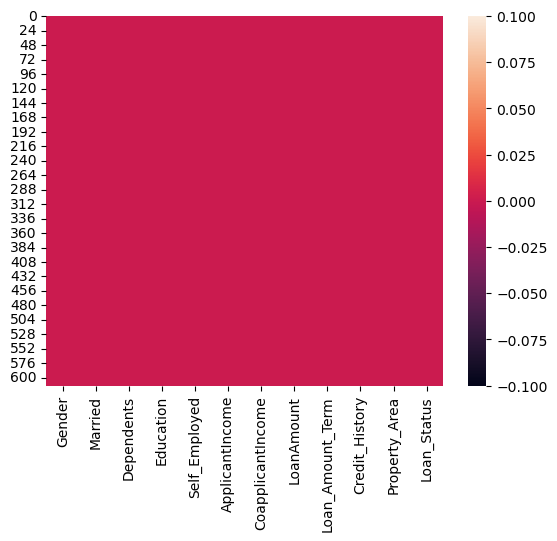

In [147]:
sns.heatmap(lo1.isnull())

In [148]:
lo1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:
    
1) The standard deviation of all the columns except credit history seems high which suggests outliers in the data.

2) There is difference between mean & median of each and every column which suggests the skewness in the columns. We will only remove the skewness of columns which are not categorical.

3) Again we can see that there is there is huge difference in values of 75% and the maximum values of columns except credit history which is a categorical column. So the different between 75% and maximum values suggest the outliers in columns.

In [149]:
lo1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

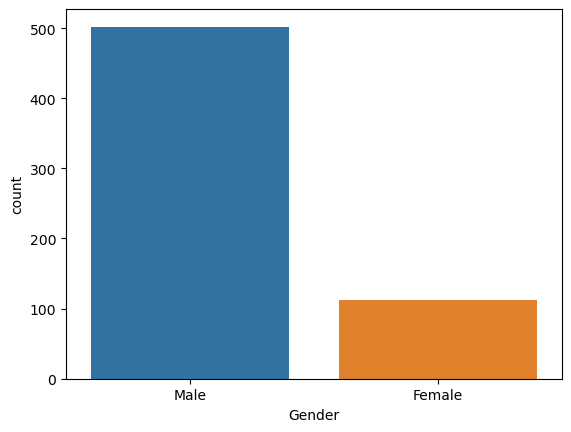

In [150]:
sns.countplot(lo1['Gender'])

Here we can see that male are present more in application as comapared to females.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

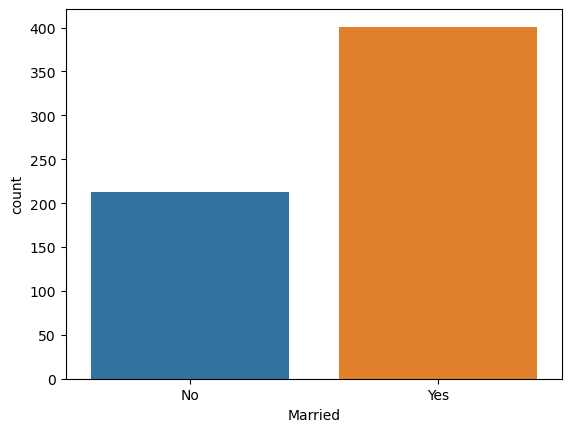

In [151]:
sns.countplot(lo1['Married'])

Married People are more as compared to unmarried in the application for the loan.

In [152]:
lo1['Dependents'].nunique()

4

In [153]:
lo1['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

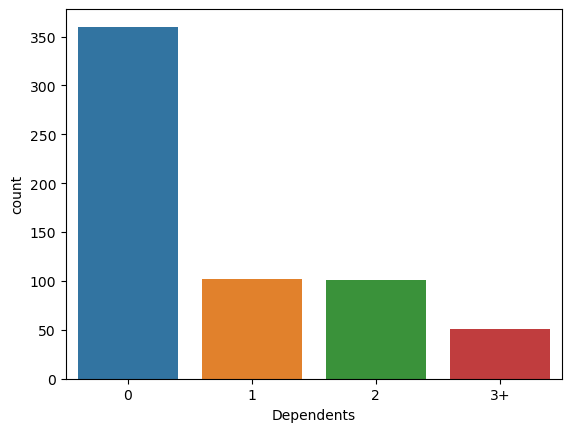

In [154]:
sns.countplot(lo1['Dependents'])

People with zero dependents are highest in pur data set.

In [155]:
lo1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

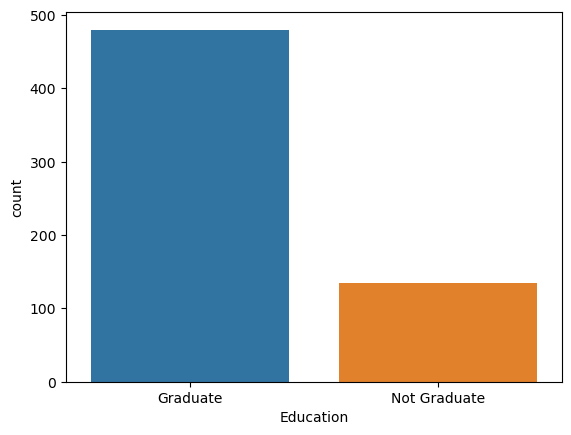

In [156]:
sns.countplot(lo1['Education'])

Graduated people are more as compated to Non Graduate.

In [157]:
lo1['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

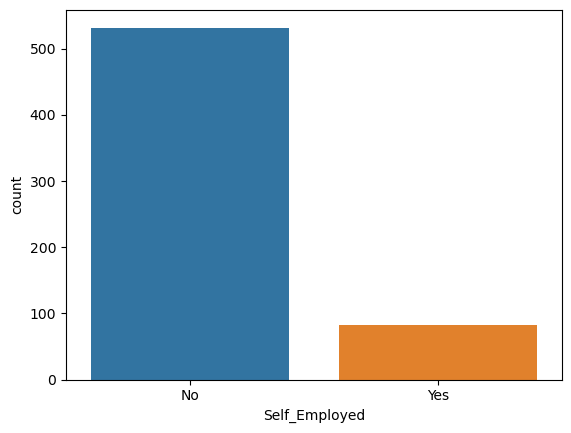

In [158]:
sns.countplot(lo1['Self_Employed'])

People doing jobs are more as compared to people who are self employed.

In [159]:
lo1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [160]:
lo1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

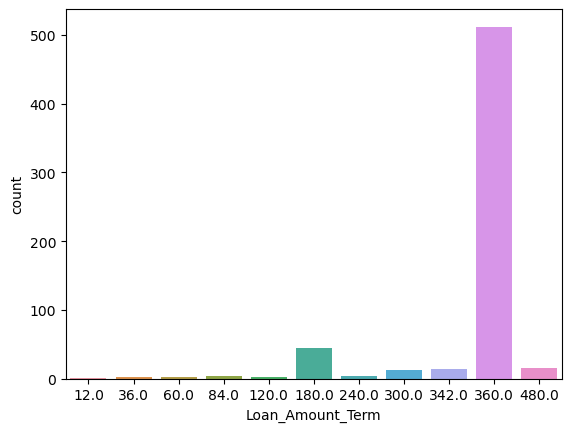

In [161]:
sns.countplot(lo1['Loan_Amount_Term'])

People with 360 months loan term are highest in the set.

In [162]:
lo1['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

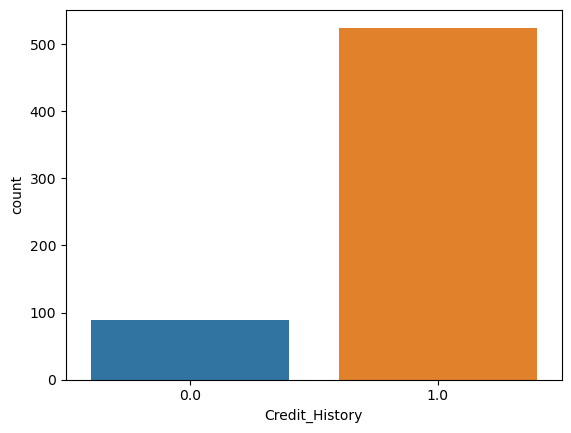

In [163]:
sns.countplot(lo1['Credit_History'])

People having the Credict history are more as comapered to the peopled not having the credit history.

In [164]:
lo1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

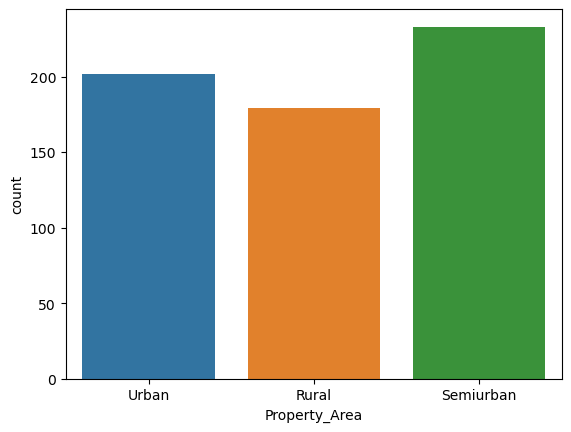

In [165]:
sns.countplot(lo1['Property_Area'])

People living in Semi-urban area are more as compared to Urban & Rural Areas.

In [166]:
lo1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

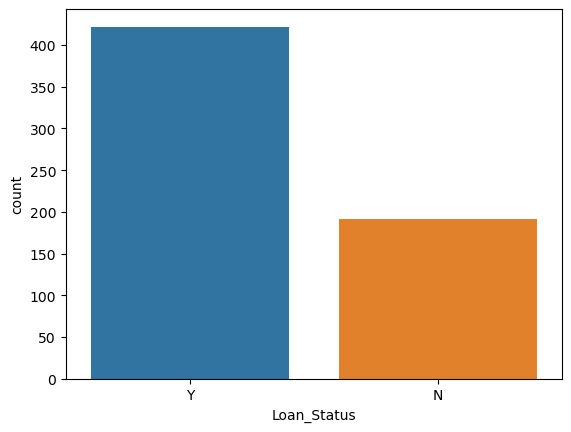

In [167]:
sns.countplot(lo1['Loan_Status'])

People with Yes status are more then No. This is our target variable and it is not balanced properly hence we will have to balance the data at certain stage.

In [168]:
lo1.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_9316\1934008119.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lo1.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [169]:
out = lo1[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

We have separated the columns who have outliers in them. And now we will find the outliers only from them.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


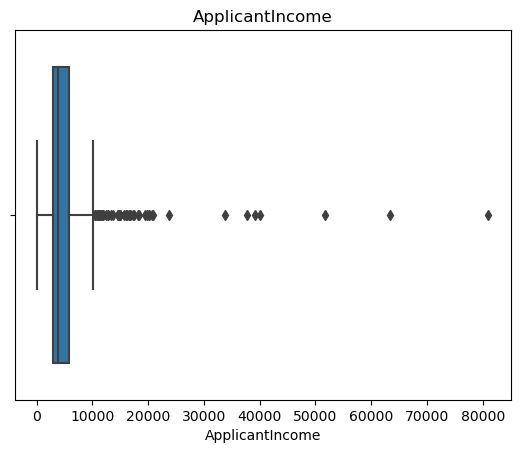

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


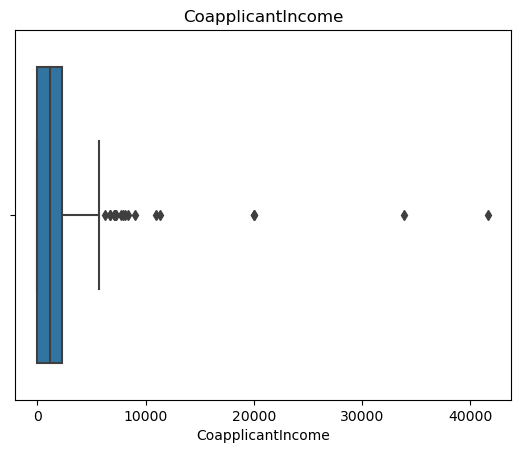

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


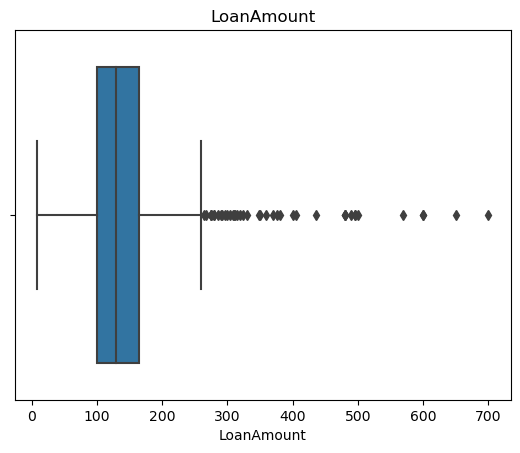

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


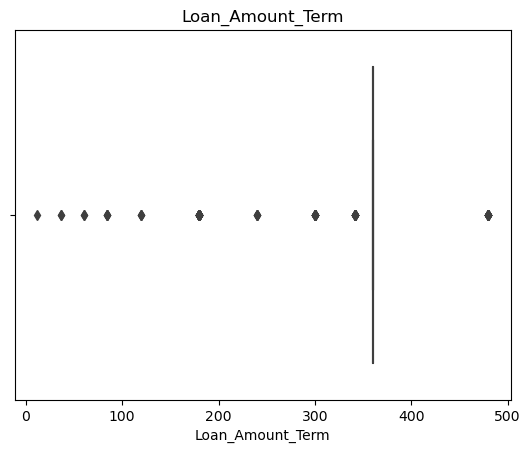

In [170]:
for i in out.columns:
    sns.boxplot(out[i])
    plt.title(i)
    plt.show()

In [171]:
from scipy.stats import zscore

In [172]:
Z = np.abs(zscore(out))

In [173]:
thereshold = 3
print(np.where(Z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


Converting the Object columns into numerical type columns.

In [174]:
from sklearn.preprocessing import OrdinalEncoder

In [175]:
oe = OrdinalEncoder()

for i in lo1.columns:
    if lo1[i].dtypes == 'object':
        lo1[i] = oe.fit_transform(lo1[i].values.reshape(-1,1))

In [176]:
lo1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


We have converted our columns from string to integer & now we will be removing outliers from set.

In [177]:
loan = lo1[(Z<3).all(axis =1)]

In [178]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [179]:
lo1.shape

(614, 12)

In [180]:
loan.shape

(577, 12)

Here we can see that after removing outliers we have lost 37 rows from our data set.

In [181]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104412,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127289,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135610,-0.083756,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.094628,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.033346,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.050606,0.036664,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.060345,-0.011102,-0.093505,0.045009
LoanAmount,0.159957,0.165147,0.135610,-0.146598,0.121892,0.442394,0.309479,1.000000,0.040302,0.008541,-0.075749,-0.035289
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.050606,-0.060345,0.040302,1.000000,0.034027,-0.058990,-0.018144
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.036664,-0.011102,0.008541,0.034027,1.000000,-0.008121,0.560936


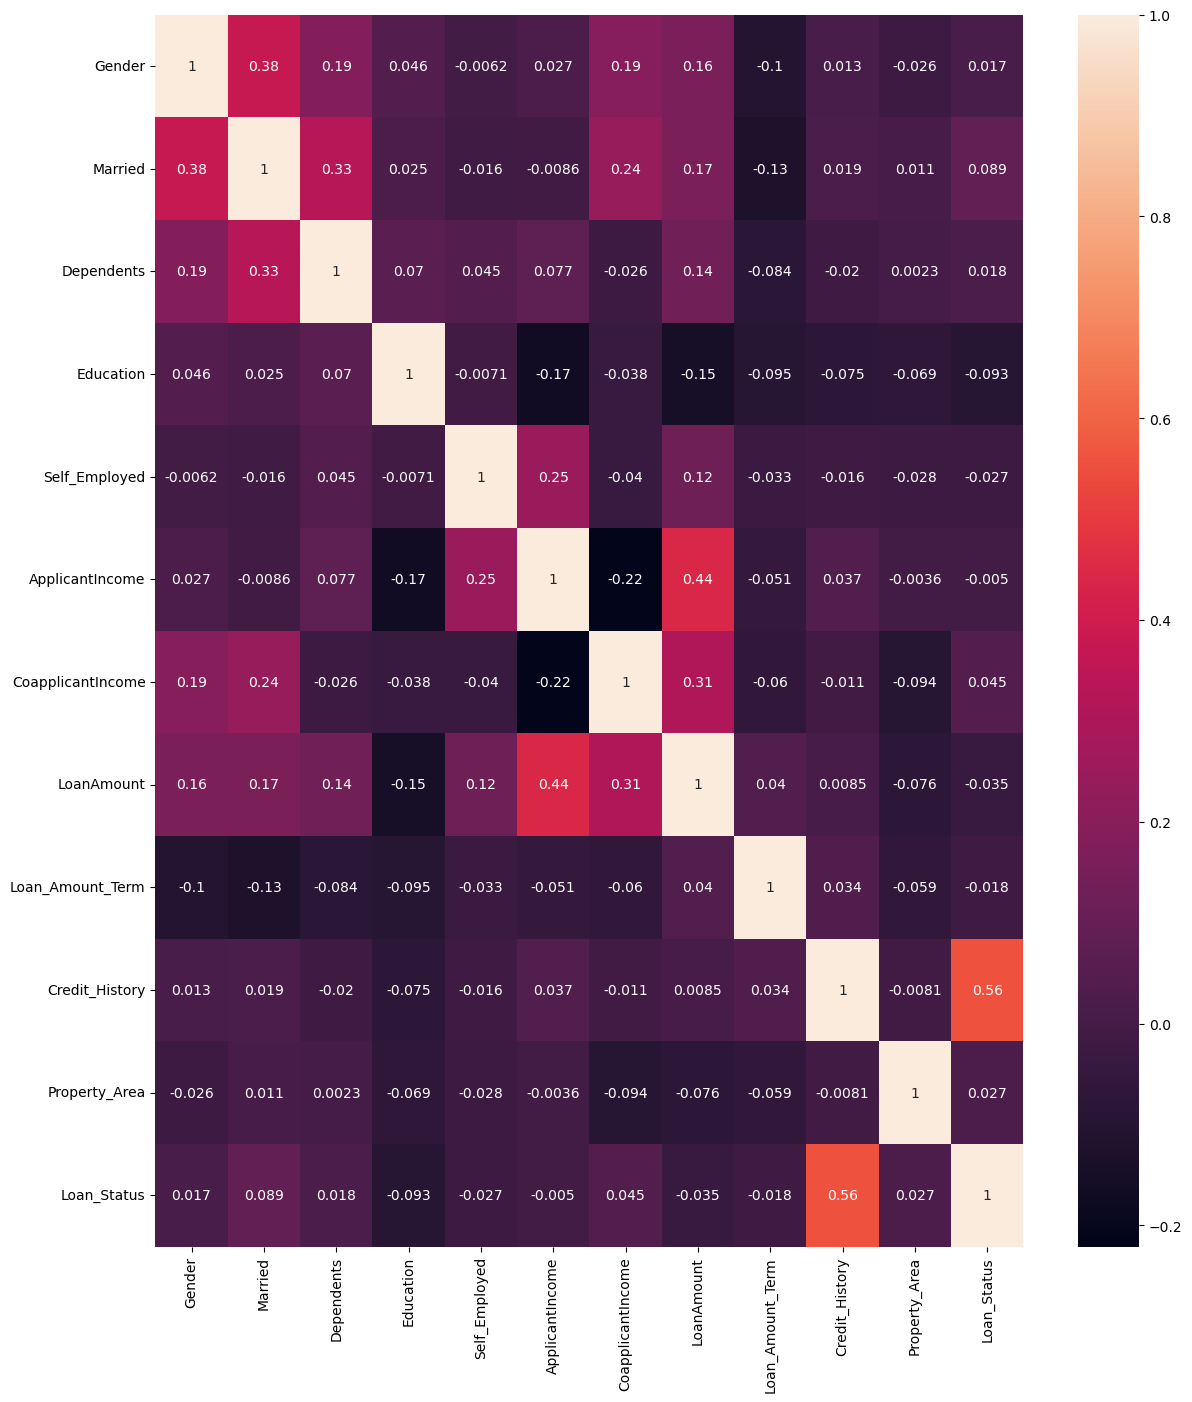

In [182]:
plt.figure(figsize = (14,16))
sns.heatmap(loan.corr(), annot = True)
plt.show()

Through the Heatmap we can see that except the credit history all the attributes are having negetive relation with loan status.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

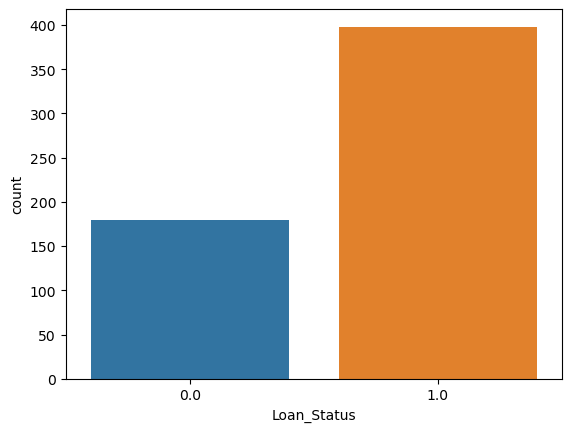

In [183]:
sns.countplot(loan['Loan_Status'])

Our data is imbalanced hence we will have to balance the dat through over fitting method.

In [184]:
from imblearn.over_sampling import SMOTE

In [185]:
x = loan.drop('Loan_Status', axis = 1)
y = loan['Loan_Status']

In [186]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0


In [187]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 577, dtype: float64

In [188]:
sm = SMOTE()

x_re,y_re = sm.fit_resample(x,y)

In [189]:
x_re

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.000000,0.000000,0.000000,0.000000,5849,0.000000,146.412162,360.000000,1.000000,2.000000
1,1.0,1.000000,1.000000,0.000000,0.000000,4583,1508.000000,128.000000,360.000000,1.000000,0.000000
2,1.0,1.000000,0.000000,0.000000,1.000000,3000,0.000000,66.000000,360.000000,1.000000,2.000000
3,1.0,1.000000,0.000000,1.000000,0.000000,2583,2358.000000,120.000000,360.000000,1.000000,2.000000
4,1.0,0.000000,0.000000,0.000000,0.000000,6000,0.000000,141.000000,360.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
791,1.0,0.290978,0.000000,0.000000,0.000000,6120,4468.085044,223.257917,360.000000,0.290978,0.290978
792,1.0,1.000000,2.374797,1.000000,0.208401,4750,0.000000,103.961244,345.751218,0.208401,1.208401
793,1.0,0.455032,0.000000,0.544968,0.000000,2100,0.000000,107.091892,360.000000,0.544968,2.000000
794,0.0,0.000000,0.000000,0.000000,0.000000,4230,0.000000,112.013009,360.000000,0.999458,1.000000


In [190]:
y_re

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
791    0.0
792    0.0
793    0.0
794    0.0
795    0.0
Name: Loan_Status, Length: 796, dtype: float64

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

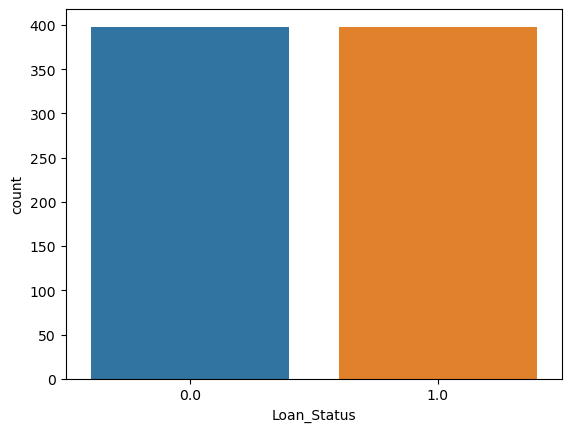

In [191]:
sns.countplot(y_re)

Here we can see that the target variable is now balanced and we can proceed further.

We have already separeted our target variable and other variables hence now we will now first try to remove skewness using powertransformer and then stadardize the data using standard scaler.

In [192]:
x_re.skew()

Gender              -1.684992
Married             -0.525749
Dependents           1.079696
Education            1.214084
Self_Employed        2.138841
ApplicantIncome      2.136429
CoapplicantIncome    1.315446
LoanAmount           1.144517
Loan_Amount_Term    -1.826414
Credit_History      -1.280400
Property_Area       -0.057042
dtype: float64

In [193]:
from sklearn.preprocessing import PowerTransformer

In [194]:
pt = PowerTransformer()

for i in x_re.columns:
    x_re[i] = pt.fit_transform(x_re[i].values.reshape(-1,1))

In [195]:
x_re.skew()

Gender              -1.522990
Married             -0.475926
Dependents           0.411155
Education            1.028917
Self_Employed        1.863642
ApplicantIncome      0.003850
CoapplicantIncome   -0.107979
LoanAmount           0.048780
Loan_Amount_Term     0.551516
Credit_History      -1.074053
Property_Area       -0.150420
dtype: float64

In [196]:
from sklearn.preprocessing import StandardScaler

In [197]:
ss = StandardScaler()

x1 = pd.DataFrame(ss.fit_transform(x_re), columns = x_re.columns)

In [198]:
x1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.690171,-1.071541,0.323967,0.152232,0.617350,1.230489
1,0.505708,0.821162,0.883740,-0.622279,-0.438738,0.236414,0.801499,-0.019931,0.152232,0.617350,-1.382712
2,0.505708,0.821162,-0.862929,-0.622279,2.339368,-0.549760,-1.071541,-1.509124,0.152232,0.617350,1.230489
3,0.505708,0.821162,-0.862929,1.698943,-0.438738,-0.826783,0.936023,-0.179758,0.152232,0.617350,1.230489
4,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.737639,-1.071541,0.226051,0.152232,0.617350,1.230489
...,...,...,...,...,...,...,...,...,...,...,...
791,0.505708,-0.891446,-0.862929,-0.622279,-0.438738,0.774524,1.132941,1.507349,0.152232,-1.617396,-0.952953
792,0.505708,0.821162,1.455828,1.698943,1.931148,0.302940,-1.071541,-0.523136,-0.186749,-1.681780,0.272712
793,0.505708,-0.577496,-0.862929,1.502466,-0.438738,-1.209409,-1.071541,-0.453453,0.152232,-1.254676,1.230489
794,-2.075032,-1.333964,-0.862929,-0.622279,-0.438738,0.087501,-1.071541,-0.346627,0.152232,0.613622,0.007419


We have standardized our data using standardscaler now we will try to see variance inflation factor among the independent attributes.

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [200]:
vari = variance_inflation_factor

In [201]:
vif = pd.DataFrame()

vif['values'] = [vari(x1.values,i)for i in range (len(x1.columns))]
vif['Features'] = x1.columns

In [202]:
vif

,values,Features
0,1.229049,Gender
1,1.429733,Married
2,1.168695,Dependents
3,1.083585,Education
4,1.076929,Self_Employed
5,1.835079,ApplicantIncome
6,1.616976,CoapplicantIncome
7,1.636209,LoanAmount
8,1.060263,Loan_Amount_Term
9,1.028105,Credit_History


The variance inflation factor for the columns seems to be in limit hence it can be said that there is no multicolinearity present in the data set. Will go ahead and now implement the different model on data and will save the best.

In [203]:
loan2 = x1

In [204]:
loan2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.690171,-1.071541,0.323967,0.152232,0.617350,1.230489
1,0.505708,0.821162,0.883740,-0.622279,-0.438738,0.236414,0.801499,-0.019931,0.152232,0.617350,-1.382712
2,0.505708,0.821162,-0.862929,-0.622279,2.339368,-0.549760,-1.071541,-1.509124,0.152232,0.617350,1.230489
3,0.505708,0.821162,-0.862929,1.698943,-0.438738,-0.826783,0.936023,-0.179758,0.152232,0.617350,1.230489
4,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.737639,-1.071541,0.226051,0.152232,0.617350,1.230489
...,...,...,...,...,...,...,...,...,...,...,...
791,0.505708,-0.891446,-0.862929,-0.622279,-0.438738,0.774524,1.132941,1.507349,0.152232,-1.617396,-0.952953
792,0.505708,0.821162,1.455828,1.698943,1.931148,0.302940,-1.071541,-0.523136,-0.186749,-1.681780,0.272712
793,0.505708,-0.577496,-0.862929,1.502466,-0.438738,-1.209409,-1.071541,-0.453453,0.152232,-1.254676,1.230489
794,-2.075032,-1.333964,-0.862929,-0.622279,-0.438738,0.087501,-1.071541,-0.346627,0.152232,0.613622,0.007419


In [205]:
loan2['Loan Status'] = y_re

In [206]:
loan2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Status
0,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.690171,-1.071541,0.323967,0.152232,0.617350,1.230489,1.0
1,0.505708,0.821162,0.883740,-0.622279,-0.438738,0.236414,0.801499,-0.019931,0.152232,0.617350,-1.382712,0.0
2,0.505708,0.821162,-0.862929,-0.622279,2.339368,-0.549760,-1.071541,-1.509124,0.152232,0.617350,1.230489,1.0
3,0.505708,0.821162,-0.862929,1.698943,-0.438738,-0.826783,0.936023,-0.179758,0.152232,0.617350,1.230489,1.0
4,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.737639,-1.071541,0.226051,0.152232,0.617350,1.230489,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.505708,-0.891446,-0.862929,-0.622279,-0.438738,0.774524,1.132941,1.507349,0.152232,-1.617396,-0.952953,0.0
792,0.505708,0.821162,1.455828,1.698943,1.931148,0.302940,-1.071541,-0.523136,-0.186749,-1.681780,0.272712,0.0
793,0.505708,-0.577496,-0.862929,1.502466,-0.438738,-1.209409,-1.071541,-0.453453,0.152232,-1.254676,1.230489,0.0
794,-2.075032,-1.333964,-0.862929,-0.622279,-0.438738,0.087501,-1.071541,-0.346627,0.152232,0.613622,0.007419,0.0


In [207]:
x2 = loan2.iloc[:,:-1]
y2 = loan2.iloc[:,-1]

In [208]:
x2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.690171,-1.071541,0.323967,0.152232,0.617350,1.230489
1,0.505708,0.821162,0.883740,-0.622279,-0.438738,0.236414,0.801499,-0.019931,0.152232,0.617350,-1.382712
2,0.505708,0.821162,-0.862929,-0.622279,2.339368,-0.549760,-1.071541,-1.509124,0.152232,0.617350,1.230489
3,0.505708,0.821162,-0.862929,1.698943,-0.438738,-0.826783,0.936023,-0.179758,0.152232,0.617350,1.230489
4,0.505708,-1.333964,-0.862929,-0.622279,-0.438738,0.737639,-1.071541,0.226051,0.152232,0.617350,1.230489
...,...,...,...,...,...,...,...,...,...,...,...
791,0.505708,-0.891446,-0.862929,-0.622279,-0.438738,0.774524,1.132941,1.507349,0.152232,-1.617396,-0.952953
792,0.505708,0.821162,1.455828,1.698943,1.931148,0.302940,-1.071541,-0.523136,-0.186749,-1.681780,0.272712
793,0.505708,-0.577496,-0.862929,1.502466,-0.438738,-1.209409,-1.071541,-0.453453,0.152232,-1.254676,1.230489
794,-2.075032,-1.333964,-0.862929,-0.622279,-0.438738,0.087501,-1.071541,-0.346627,0.152232,0.613622,0.007419


In [209]:
y2

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
791    0.0
792    0.0
793    0.0
794    0.0
795    0.0
Name: Loan Status, Length: 796, dtype: float64

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Searching for best random in the data set.

In [211]:
maxac = 0
maxrs = 0

for i in range(1,500):
    lg = LogisticRegression()
    x_train,x_test,y_train,y_test = train_test_split(x2,y2, test_size = 0.30, random_state =  i)
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    ac = accuracy_score(y_test,pred)
    if ac > maxac:
        maxac = ac
        maxrs = i

        
print('The highest accuracy score is', maxac, 'at the random state', maxrs)

The highest accuracy score is 0.8368200836820083 at the random state 146


In [212]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size = 0.30, random_state = 86)

In [213]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [214]:
lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
lgac = accuracy_score(y_test,lgpred)
lgcon = confusion_matrix(y_test,lgpred)
lgclass = classification_report(y_test, lgpred)

print(lgac.round(2))
print(lgcon)
print(lgclass)

0.82
[[ 69  34]
 [ 10 126]]
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76       103
         1.0       0.79      0.93      0.85       136

    accuracy                           0.82       239
   macro avg       0.83      0.80      0.80       239
weighted avg       0.82      0.82      0.81       239



In [215]:
rfc = RandomForestClassifier()

rfc.fit(x_test,y_test)
rfcpred = rfc.predict(x_test)
rfcac = accuracy_score(y_test,rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print(rfcac.round(2))
print(rfccon)
print(rfcclass)

1.0
[[103   0]
 [  0 136]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       103
         1.0       1.00      1.00      1.00       136

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



In [216]:
etc = ExtraTreesClassifier()

etc.fit(x_train,y_train)
etcpred = etc.predict(x_test)
etcac = accuracy_score(y_test,etcpred)
etccon = confusion_matrix(y_test,etcpred)
etcclass = classification_report(y_test,etcpred)

print(etcac.round(2))
print(etccon)
print(etcclass)

0.85
[[ 86  17]
 [ 19 117]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       103
         1.0       0.87      0.86      0.87       136

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



In [217]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train,y_train)
gbcpred = gbc.predict(x_test)
gbcac = accuracy_score(y_test,gbcpred)
gbccon = confusion_matrix(y_test,gbcpred)
gbcclass = classification_report(y_test,gbcpred)

print(gbcac.round(2))
print(gbccon)
print(gbcclass)

0.88
[[ 81  22]
 [  7 129]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       103
         1.0       0.85      0.95      0.90       136

    accuracy                           0.88       239
   macro avg       0.89      0.87      0.87       239
weighted avg       0.88      0.88      0.88       239



In [218]:
adc = AdaBoostClassifier()

adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcac = accuracy_score(y_test,adcpred)
adccon = confusion_matrix(y_test,adcpred)
adcclass = classification_report(y_test,adcpred)

print(adcac.round(2))
print(adccon)
print(adcclass)

0.87
[[ 82  21]
 [ 10 126]]
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       103
         1.0       0.86      0.93      0.89       136

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.87       239
weighted avg       0.87      0.87      0.87       239



In [219]:
svc = SVC()

svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcac = accuracy_score(y_test,svcpred)
svccon = confusion_matrix(y_test,svcpred)
svcclass = classification_report(y_test,svcpred)

print(svcac.round(2))
print(svccon)
print(svcclass)

0.83
[[ 73  30]
 [ 10 126]]
              precision    recall  f1-score   support

         0.0       0.88      0.71      0.78       103
         1.0       0.81      0.93      0.86       136

    accuracy                           0.83       239
   macro avg       0.84      0.82      0.82       239
weighted avg       0.84      0.83      0.83       239



In [220]:
print('The Accuracy Score for Logistic Regression',lgac.round(2))
print('The Accuracy Score for Random Forest',rfcac.round(2))
print('The Accuracy Score for Gradient Boost', gbcac.round(2))
print('The Accuracy Score for Extra Trees',etcac.round(2))
print('The Accuracy Score for Ada Boost', adcac.round(2))
print('The Accuracy Score for Support Vector', svcac.round(2))

The Accuracy Score for Logistic Regression 0.82
The Accuracy Score for Random Forest 1.0
The Accuracy Score for Gradient Boost 0.88
The Accuracy Score for Extra Trees 0.85
The Accuracy Score for Ada Boost 0.87
The Accuracy Score for Support Vector 0.83


It can be seen that the Random Forest Classifier is having highest accuracy with 100%. We will go ahead and check the Cross Val score for all the medals.

In [221]:
print('The Cross Val Score for All models')

print('Logistic Regression', cross_val_score(lg,x2,y2).mean())
print('Random Foresr', cross_val_score(rfc,x2,y2).mean())
print('Extra Trees', cross_val_score(etc,x2,y2).mean())
print('Gradient Boost', cross_val_score(gbc,x2,y2).mean())
print('Ada Boost', cross_val_score(adc,x2,y2).mean())
print('Support Vector', cross_val_score(svc,x2,y2).mean())

The Cross Val Score for All models
Logistic Regression 0.7702201257861635
Random Foresr 0.8531918238993711
Extra Trees 0.8204795597484278
Gradient Boost 0.8280660377358491
Ada Boost 0.8092295597484277
Support Vector 0.7777437106918239


So the cross val score seems to be limit for Every model. Hence we can say that Random Forest Classifier is best fitting model on the data. We will do hyper parameter tunning on it and save it.

In [222]:
from sklearn.model_selection import GridSearchCV

In [227]:
param = param_grid = {
    'n_estimators': [100, 200, 300],          
    'criterion': ['gini', 'entropy'],                   
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]}

In [228]:
gcv = GridSearchCV(RandomForestClassifier(),param,cv =5)

In [229]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [230]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 100}

In [240]:
fm = RandomForestClassifier(bootstrap = True,criterion = 'entropy', max_features = 'auto', n_estimators = 300)

In [241]:
fm.fit(x_train,y_train)
fmpred = fm.predict(x_test)
fmac = accuracy_score(y_test,fmpred)
fmccon = confusion_matrix(y_test,fmpred)
fmcclass = classification_report(y_test,fmpred)

print(fmac.round(2))
print(fmccon)
print(fmcclass)

0.9
[[ 85  18]
 [  7 129]]
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       103
         1.0       0.88      0.95      0.91       136

    accuracy                           0.90       239
   macro avg       0.90      0.89      0.89       239
weighted avg       0.90      0.90      0.89       239



So we have done hyper parameter tunning and now we will save our final model.

In [242]:
import joblib

In [243]:
joblib.dump(fm, 'Loan Application Status')

['Loan Application Status']

In [245]:
model = joblib.load('Loan Application Status')

In [246]:
predi = model.predict(x_test)

In [247]:
A = np.array(y_test)

In [249]:
df =pd.DataFrame()

df['Predicted'] = predi
df['Original'] = A

df

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
...,...,...
234,0.0,0.0
235,1.0,1.0
236,0.0,0.0
237,1.0,1.0


In [250]:
from sklearn.metrics import roc_curve, auc

In [252]:
fpr,tpr,_ = roc_curve(predi, y_test)

In [253]:
roc_auc = auc(fpr,tpr)

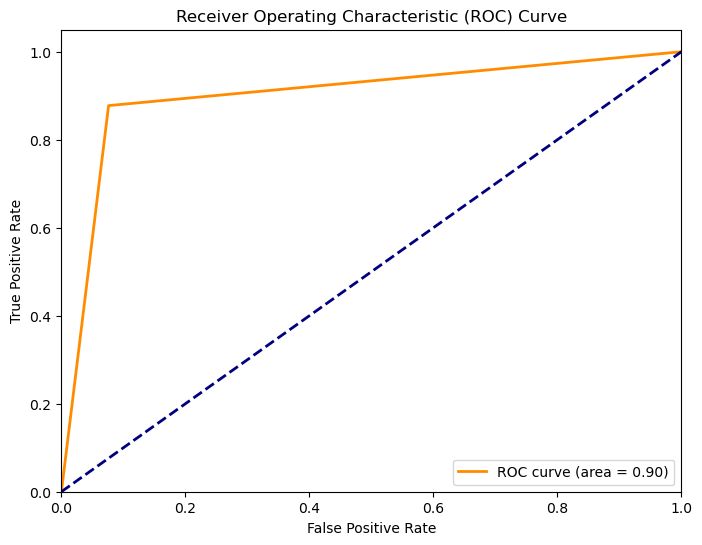

In [254]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion :
    
## The Accuracy Score for Prediction of Loan Application status is 90%